11501568/11490434 [==============================] - 0s 0us/step


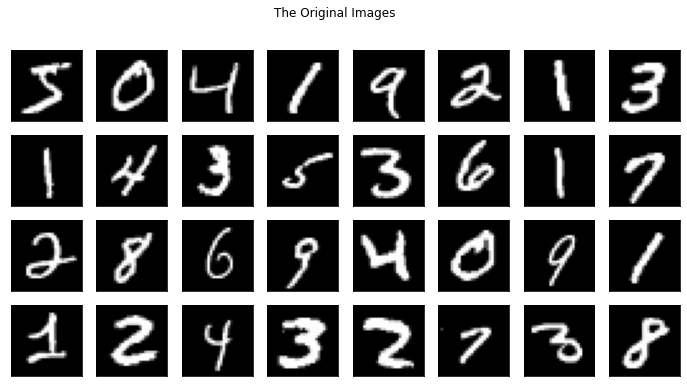

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 - 3s - loss: 0.6197 - val_loss: 0.4709
Epoch 2/20
20/20 - 0s - loss: 0.3576 - val_loss: 0.3049
Epoch 3/20
20/20 - 0s - loss: 0.2813 - val_loss: 0.2809
Epoch 4/20
20/20 - 0s - loss: 0.2646 - val_loss: 0.2651
Epoch 5/20
20/20 - 0s - loss: 0.2509 - val_loss: 0.2514
Epoch 6/20
20/20 - 0s - loss: 0.2386 - val_loss: 0.2398
Epoch 7/20
20/20 - 0s - loss: 0.2281 - val_loss: 0.

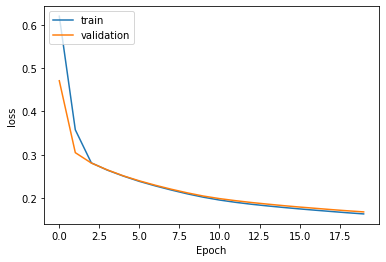

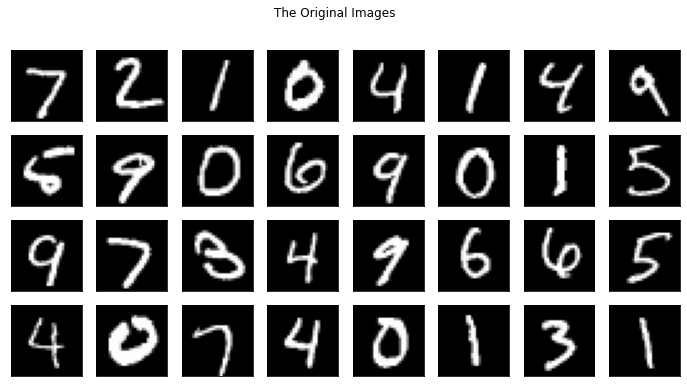

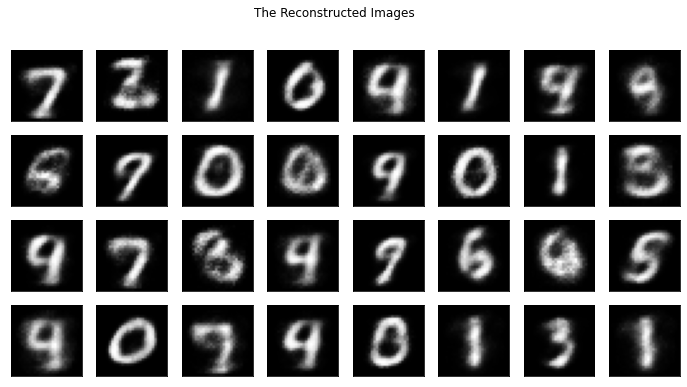

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D
import matplotlib.pyplot as plt
import numpy as np

(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

# to convert values from 0 to 255 into range 0 to 1.
train_X = x_train_image.astype('float32') / 255.
test_X = x_test_image.astype('float32') / 255.
train_X = np.reshape(train_X, (len(train_X), 28*28))  # adapt this if using `channels_first` image data format
test_X = np.reshape(test_X, (len(test_X), 28*28))  # adapt this if using `channels_first` image data format

# visualize original and noisy images"""
def plot_multiimages(images, title, idx, num=32):
    fig, ax = plt.subplots(4, 8, figsize=(12, 6))
    if num > 32: num = 32
    for i in range(0, num):
        ax=plt.subplot(4,8, 1+i)
        ax.imshow(images[idx].reshape(28, 28), cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    fig.suptitle(title)
    plt.show()

plot_multiimages(train_X, 'The Original Images', 0, 32)

#Defining our Image denoising autoencoder
Input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(Input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(Input_img, decoded)

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()

# Training the autoencoder
train_history = autoencoder.fit(train_X[0:5000], train_X[0:5000],
                epochs=20,
                batch_size=200,
                shuffle=True,
                validation_split=0.2,
                verbose=2)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title="Train History"
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history, 'loss', 'val_loss')

# Making Predictions
# to predict the reconstructed images for the original images.
pred = autoencoder.predict(test_X[0:1000])

# Visualizing our results
plot_multiimages(test_X, 'The Original Images', 0, 32)
plot_multiimages(pred, 'The Reconstructed Images', 0, 32)